# Projet - Analyse de données - Associations

Segmenter les régions

Analyser les dates de création des asssos en fonction des thématiques des régions

# Chargement des données 

In [141]:
import pandas
import matplotlib.pyplot as plt

assos=pandas.read_csv("ref-france-association-repertoire-national.csv", sep=";")
assos


,Id,Ancien Id,SIRET,Numéro de RUP,Gestion,Date de création,Date de déclaration,Date de publication,Date de dissolution,Nature,...,SIte Web,Publication sur le web,Observation,Position,Date de Mise à jour,geo_point_2d,Nom Officiel Département,Nom Officiel EPCI,Nom Officiel Région,Code Iso 3166-3 Zone
0,741P0741014598,0741014598,NaN,NaN,741P,2005-12-02,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:49+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
1,741P0741014686,0741014686,NaN,NaN,741P,2006-03-23,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:51+01:00,"45.88142,6.323178",Haute-Savoie,CC des Vallées de Thônes,Auvergne-Rhône-Alpes,FXX
2,741P0741014759,0741014759,NaN,NaN,741P,2006-07-24,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:52+01:00,"45.993193,6.289847",Haute-Savoie,CA du Grand Annecy,Auvergne-Rhône-Alpes,FXX
3,741P0741014812,0741014812,NaN,NaN,741P,2006-10-09,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:53+01:00,"45.945411,6.058328",Haute-Savoie,CC Fier et Usses,Auvergne-Rhône-Alpes,FXX
4,741P0741014823,0741014823,NaN,NaN,741P,2006-10-19,NaN,NaN,NaN,D,...,NaN,aucune information,W741009580,R,2020-03-05T04:13:59+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107601,W251003011,NaN,NaN,NaN,251P,2012-04-23,2020-12-23,2012-05-12,NaN,D,...,NaN,non,NaN,Active,2021-06-24T22:00:02+02:00,"47.249188,6.055178",Doubs,CU Grand Besançon Métropole,Bourgogne-Franche-Comté,FXX
3107602,W251003035,NaN,NaN,NaN,251P,2012-05-22,2012-05-22,2012-06-02,NaN,D,...,NaN,non,NaN,Active,2012-06-02T14:46:05+02:00,"47.505804,6.463836",Doubs,CC des Deux Vallées Vertes,Bourgogne-Franche-Comté,FXX
3107603,W251003056,NaN,NaN,NaN,251P,2012-06-04,2018-12-27,2012-06-23,NaN,D,...,NaN,non,NaN,Active,2019-06-28T22:00:03+02:00,"47.273283,6.00152",Doubs,CU Grand Besançon Métropole,Bourgogne-Franche-Comté,FXX
3107604,W251003062,0251016744,NaN,NaN,251P,2005-09-21,2014-07-04,2005-10-15,NaN,D,...,NaN,non,NaN,Active,2015-01-02T21:00:07+01:00,"47.216777,6.05008",Doubs,CU Grand Besançon Métropole,Bourgogne-Franche-Comté,FXX


In [142]:
assos_study=pandas.read_csv("ref-france-association-repertoire-national.csv", sep=";",nrows=25000)
assos_study.head()

,Id,Ancien Id,SIRET,Numéro de RUP,Gestion,Date de création,Date de déclaration,Date de publication,Date de dissolution,Nature,...,SIte Web,Publication sur le web,Observation,Position,Date de Mise à jour,geo_point_2d,Nom Officiel Département,Nom Officiel EPCI,Nom Officiel Région,Code Iso 3166-3 Zone
0,741P0741014598,0741014598,NaN,NaN,741P,2005-12-02,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:49+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
1,741P0741014686,0741014686,NaN,NaN,741P,2006-03-23,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:51+01:00,"45.88142,6.323178",Haute-Savoie,CC des Vallées de Thônes,Auvergne-Rhône-Alpes,FXX
2,741P0741014759,0741014759,NaN,NaN,741P,2006-07-24,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:52+01:00,"45.993193,6.289847",Haute-Savoie,CA du Grand Annecy,Auvergne-Rhône-Alpes,FXX
3,741P0741014812,0741014812,NaN,NaN,741P,2006-10-09,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:53+01:00,"45.945411,6.058328",Haute-Savoie,CC Fier et Usses,Auvergne-Rhône-Alpes,FXX
4,741P0741014823,0741014823,NaN,NaN,741P,2006-10-19,NaN,NaN,NaN,D,...,NaN,aucune information,W741009580,R,2020-03-05T04:13:59+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN


# Nettoyage des données

## Analyse des différents champs 
On va essayer d'analyser les différents champs que nous avons à disposition pour concentrer nos analyses que sur les axes les plus pertinents. Deux types de colonnes qui vont pouvoir être retirées:
* les colonnes qui ne sont pas directement utiles pour notre but premier
* les colonnes qui sont complètement, ou presque complètement, vides, et qui ne pourront pas contribuer beaucoup à l'analyse.

In [150]:
assos_study.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Id                                          25000 non-null  object 
 1   Ancien Id                                   22636 non-null  object 
 2   SIRET                                       167 non-null    float64
 3   Numéro de RUP                               1 non-null      object 
 4   Gestion                                     25000 non-null  object 
 5   Date de création                            15031 non-null  object 
 6   Date de déclaration                         4677 non-null   object 
 7   Date de publication                         15322 non-null  object 
 8   Date de dissolution                         544 non-null    object 
 9   Nature                                      25000 non-null  object 
 10  Groupement

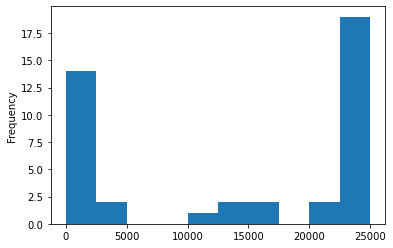

In [151]:
#On va déterminer le nombre de valeurs renseignées par colonnes 
CountedValues=assos_study.count()
CountedValues.plot.hist()
plt.show()

### Suppression des colonnes vides
Filtrons pour pouvoir supprimer toutes les colonnes vides

In [152]:
CountedValues=assos_study.count()

Colonnes_Gardees=CountedValues>0
Colonnes_Gardees

Indexs=CountedValues[Colonnes_Gardees].index

assos_study[Indexs]


,Id,Ancien Id,SIRET,Numéro de RUP,Gestion,Date de création,Date de déclaration,Date de publication,Date de dissolution,Nature,...,SIte Web,Publication sur le web,Observation,Position,Date de Mise à jour,geo_point_2d,Nom Officiel Département,Nom Officiel EPCI,Nom Officiel Région,Code Iso 3166-3 Zone
0,741P0741014598,0741014598,NaN,NaN,741P,2005-12-02,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:49+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
1,741P0741014686,0741014686,NaN,NaN,741P,2006-03-23,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:51+01:00,"45.88142,6.323178",Haute-Savoie,CC des Vallées de Thônes,Auvergne-Rhône-Alpes,FXX
2,741P0741014759,0741014759,NaN,NaN,741P,2006-07-24,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:52+01:00,"45.993193,6.289847",Haute-Savoie,CA du Grand Annecy,Auvergne-Rhône-Alpes,FXX
3,741P0741014812,0741014812,NaN,NaN,741P,2006-10-09,NaN,NaN,NaN,D,...,NaN,aucune information,Reprise => date ag=0000-00-00,Active,2008-11-26T12:38:53+01:00,"45.945411,6.058328",Haute-Savoie,CC Fier et Usses,Auvergne-Rhône-Alpes,FXX
4,741P0741014823,0741014823,NaN,NaN,741P,2006-10-19,NaN,NaN,NaN,D,...,NaN,aucune information,W741009580,R,2020-03-05T04:13:59+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,W451003530,0451001255,NaN,NaN,451S,1979-09-20,1979-09-13,1979-09-20,NaN,D,...,NaN,non,Reprise auto => date publication création au ...,Active,2017-03-27T12:16:41+02:00,"47.854613,2.735016",Loiret,CC Canaux et Forêts en Gâtinais,Centre-Val de Loire,FXX
24996,W451003567,0451006083,NaN,NaN,451S,1996-03-27,1996-04-05,NaN,NaN,D,...,NaN,non,Reprise auto => date publication création au ...,Active,2017-03-27T11:59:06+02:00,"47.939832,2.738113",Loiret,CA Montargoise et Rives du Loing (A.M.E.),Centre-Val de Loire,FXX
24997,W451003623,0451007294,NaN,NaN,451S,2007-10-10,2007-10-10,NaN,NaN,D,...,NaN,non,NaN,Active,2015-06-24T16:25:42+02:00,"48.004407,2.707835",Loiret,CA Montargoise et Rives du Loing (A.M.E.),Centre-Val de Loire,FXX
24998,W451003672,NaN,NaN,NaN,451S,2015-07-06,2015-07-06,2015-08-01,NaN,D,...,NaN,non,NaN,Active,2015-08-01T14:45:23+02:00,"48.111296,2.560877",Loiret,CC des Quatre Vallées,Centre-Val de Loire,FXX


### Filtrage des colonnes (nombre de valeurs supérieurs 15000)
Le filtrage pour des colonnes avec des valeurs supérieures à 15000 nous permet de se passer de la colonne ancien id.

In [153]:
CountedValues=assos_study.count()
CountedValues

Colonnes_Gardees15000=CountedValues>15000
Colonnes_Gardees15000

Indexs15000=CountedValues[Colonnes_Gardees15000].index
Indexs15000
assos_study_filtre=assos_study[Indexs15000]
assos_study_filtre
del assos_study_filtre["Ancien Id"]
del assos_study_filtre["Date de publication"]
assos_study_filtre

,Id,Gestion,Date de création,Nature,Groupement,Titre,Objet,Objet Social 1,Objet Social 2,Code Officiel Commune Siège,...,Nom Commune Siège,Code de la civilité du dirigeant principal,Publication sur le web,Position,Date de Mise à jour,geo_point_2d,Nom Officiel Département,Nom Officiel EPCI,Nom Officiel Région,Code Iso 3166-3 Zone
0,741P0741014598,741P,2005-12-02,D,Simple,CREANOSTRA,De promouvoir la formation et ses membres par ...,15000.0,15075,74268,...,Seynod,PM,aucune information,Active,2008-11-26T12:38:49+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
1,741P0741014686,741P,2006-03-23,D,Simple,CLASSE 2007 THÔNES,Réunir les personnes de Thônes nées en 1987,7000.0,7075,74280,...,Thones,PM,aucune information,Active,2008-11-26T12:38:51+01:00,"45.88142,6.323178",Haute-Savoie,CC des Vallées de Thônes,Auvergne-Rhône-Alpes,FXX
2,741P0741014759,741P,2006-07-24,D,Simple,NON NOBIS HAUTE-SAVOIE,"L'accompagnement, le soutien et le développeme...",24000.0,20005,74282,...,Thorens-glieres,PM,aucune information,Active,2008-11-26T12:38:52+01:00,"45.993193,6.289847",Haute-Savoie,CA du Grand Annecy,Auvergne-Rhône-Alpes,FXX
3,741P0741014812,741P,2006-10-09,D,Simple,TEAM YAKUZA,Rassembler des passionnés de personnalisation ...,11000.0,11160,74272,...,Sillingy,PM,aucune information,Active,2008-11-26T12:38:53+01:00,"45.945411,6.058328",Haute-Savoie,CC Fier et Usses,Auvergne-Rhône-Alpes,FXX
4,741P0741014823,741P,2006-10-19,D,Simple,DE FIL EN PATCH,De rassembler des personnes activement intéres...,7000.0,6090,74268,...,Seynod,PM,aucune information,R,2020-03-05T04:13:59+01:00,"45.887063,6.076321",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,W451003530,451S,1979-09-20,D,Simple,LA COMPAGNIE DE LA MUSARAIGNE,o,6070.0,0,45229,...,Nogent-sur-Vernisson,PM,non,Active,2017-03-27T12:16:41+02:00,"47.854613,2.735016",Loiret,CC Canaux et Forêts en Gâtinais,Centre-Val de Loire,FXX
24996,W451003567,451S,1996-03-27,D,Simple,COMITE DES FETES DE MORMANT SUR VERNISSON,o,9030.0,0,45216,...,Mormant-sur-Vernisson,PM,non,Active,2017-03-27T11:59:06+02:00,"47.939832,2.738113",Loiret,CA Montargoise et Rives du Loing (A.M.E.),Centre-Val de Loire,FXX
24997,W451003623,451S,2007-10-10,D,Simple,LBL (LIGUE BREACKER LOIRET),pratique de la danse 'hip hop' et 'breack dance',6040.0,0,45247,...,Pannes,PM,non,Active,2015-06-24T16:25:42+02:00,"48.004407,2.707835",Loiret,CA Montargoise et Rives du Loing (A.M.E.),Centre-Val de Loire,FXX
24998,W451003672,451S,2015-07-06,D,Simple,L'AMICALE DES BASSINS,destruction des nuisibles fouisseurs pour la p...,10022.0,0,45303,...,Sceaux-du-Gâtinais,PM,non,Active,2015-08-01T14:45:23+02:00,"48.111296,2.560877",Loiret,CC des Quatre Vallées,Centre-Val de Loire,FXX


In [154]:
assos_study_filtre.columns

Index(['Id', 'Gestion', 'Date de création', 'Nature', 'Groupement', 'Titre',
       'Objet', 'Objet Social 1', 'Objet Social 2',
       'Code Officiel Commune Siège', 'Code Postal Siège', 'Nom Commune Siège',
       'Code de la civilité du dirigeant principal', 'Publication sur le web',
       'Position', 'Date de Mise à jour', 'geo_point_2d',
       'Nom Officiel Département', 'Nom Officiel EPCI', 'Nom Officiel Région',
       'Code Iso 3166-3 Zone'],
      dtype='object')

On va essayer de faire un chargement des données qu'avec les colonnes sélectionnées

In [155]:
assos_study_filtre=pandas.read_csv("ref-france-association-repertoire-national.csv", sep=";", usecols=Indexs15000)


In [160]:
assos_study_filtre.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107606 entries, 0 to 3107605
Data columns (total 23 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Id                                          object 
 1   Ancien Id                                   object 
 2   Gestion                                     object 
 3   Date de création                            object 
 4   Date de publication                         object 
 5   Nature                                      object 
 6   Groupement                                  object 
 7   Titre                                       object 
 8   Objet                                       object 
 9   Objet Social 1                              float64
 10  Objet Social 2                              object 
 11  Code Officiel Commune Siège                 object 
 12  Code Postal Siège                           object 
 13  Nom Commune Siège          

## Modélisons explicitement les variables catégorielles

In [156]:
Valeurs_uniques_by_column=assos_study_filtre.nunique()
Valeurs_uniques_by_column

Id                                            3107606
Ancien Id                                     1794534
Gestion                                           337
Date de création                                40208
Date de publication                             35277
Nature                                             16
Groupement                                          3
Titre                                         2696080
Objet                                         2633543
Objet Social 1                                    581
Objet Social 2                                    802
Code Officiel Commune Siège                     65766
Code Postal Siège                               18328
Nom Commune Siège                               62134
Code de la civilité du dirigeant principal         52
Publication sur le web                              3
Position                                            5
Date de Mise à jour                           1118003
geo_point_2d                

In [115]:
assos_study_filtre.Position.unique()


array(['Active', 'R', 'Dissoute', 'Supprimée', nan, 'I'], dtype=object)

In [157]:
from pandas.api.types import CategoricalDtype
dtype ={
    "Nature":"category",
    "Groupement":"category",
    "Position":"category",
    "Publication sur le web":"category",
}

In [158]:
assos_study_filtre_categ=pandas.read_csv("ref-france-association-repertoire-national.csv", sep=";", usecols=Indexs15000,dtype ={
    "Nature":"category",
    "Groupement":"category",
    "Position":"category",
    "Publication sur le web":"category",
})


In [159]:
assos_study_filtre_categ.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107606 entries, 0 to 3107605
Data columns (total 23 columns):
 #   Column                                      Dtype   
---  ------                                      -----   
 0   Id                                          object  
 1   Ancien Id                                   object  
 2   Gestion                                     object  
 3   Date de création                            object  
 4   Date de publication                         object  
 5   Nature                                      category
 6   Groupement                                  category
 7   Titre                                       object  
 8   Objet                                       object  
 9   Objet Social 1                              float64 
 10  Objet Social 2                              object  
 11  Code Officiel Commune Siège                 object  
 12  Code Postal Siège                           object  
 13  Nom Commune 